###### *By Saul Garcia*

In [68]:
# Import packages 
import cvxpy as cvx
import numpy as np
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from decimal import Decimal
from ggplot import *
%matplotlib inline


In [199]:
# Problem Data
m = 500 
n = 100    
np.random.seed(1235813)

#Constants
iterations = 30
A = np.asmatrix(np.random.randint(low=-1,high=1,size=(n,m)))       #Very small number
b = np.asmatrix(np.random.randint(low=1000,high=2000,size=(m,1)))  #Very large number
c = np.asmatrix(np.random.randint(low=1,high=20,size=(n,1)))       #Very small number
x = np.asmatrix(np.random.randint(low=1,high=20,size=(n,1)))       #Very small number
x2= x
#A.shape, b.shape , c.shape

In [200]:
def function(x,A,b,c):
    fx = np.dot(c.T,x) - sum(np.log10((b - np.dot(A.T, x))))
    return fx

In [201]:
def gradient(x,A,b,c):
    gradient = A * (1.0/(b - A.transpose()* x)) + c
    return gradient

In [202]:
#Backtracking footstep
def backtrack(x,A,b,c,t):
    alpha = 0.1
    beta = 0.2
    t=1
    while True:
        backtracking1 =function((x + t*-gradient(x,A,b,c)),A,b,c)
        backtracking2 = function(x,A,b,c) + alpha * t * gradient(x,A,b,c).transpose() * -(gradient(x,A,b,c))
        t=t*beta
        if backtracking1 < backtracking2:
            break

    return t


In [203]:
#Exact line search footstep
def exactline_t(x,A,b,c):
    t = np.array([.0001,.0005,.001,.005,.01,.05,.1,.5,1,1.5])
    tx = function((x + t.item(0)*-gradient(x,A,b,c)),A,b,c)
    tmin= t.item(0)
    for i in range(0,len(t)):
        if(tx >= function((x + t.item(i)*-gradient(x,A,b,c)),A,b,c)):
            tmin = t.item(i)
    tx =function((x + t.item(i)*-gradient(x,A,b,c)),A,b,c)
    return tmin 

In [204]:
#BACKTRACKING
#Constanst
iterations = 30
t = 1

# Construct the problem for Backtracking
iterk = np.array([np.arange(iterations)]).transpose() 
#Fn = np.array([np.arange(iterations)]).transpose()
Diff = np.array([np.arange(iterations)]).transpose()


for i in range(0, iterations):    
    #Fn[i] = function(x,A,b,c)                  
    Diff[i] = function(x,A,b,c)       
    t = backtrack(x,A,b,c,t)
    x = x + (t * -gradient(x,A,b,c)) 
    iterk[i] = i    #Need to update X = X + t * gradient

In [205]:
#EXACT LINE SEARCH

itere = np.array([np.arange(iterations)]).transpose()
Diffe = np.array([np.arange(iterations)]).transpose()
for i in range(0, iterations):                     
    Diffe[i] = function(x2,A,b,c)      
    x2 = x2 + (exactline_t(x2,A,b,c) * -gradient(x2,A,b,c)) 

In [206]:
#Dataframe for plotting
Dataframe = np.concatenate((itere,Diff-min(Diff),Diffe-min(Diffe)),axis=1)
df = pd.DataFrame(Dataframe)
df.columns = ['Iterations', 'Backtrack', 'Exact Line']

#Plotting Backtrack
btplot= ggplot(df, aes(x='Iterations',y='Backtrack')) + \
        geom_line(color='blue') + \
        geom_point() + \
        theme_bw()+ \
        ggtitle('Backtrack Gradient Descent')
    
#Plotting Exact Line  
elplot =ggplot(df, aes(x='Iterations',y='Exact Line')) + \
        geom_line(color='red') + \
        geom_point(color='red') + \
        theme_bw() + \
        ggtitle('Exact Line Gradient Descent')


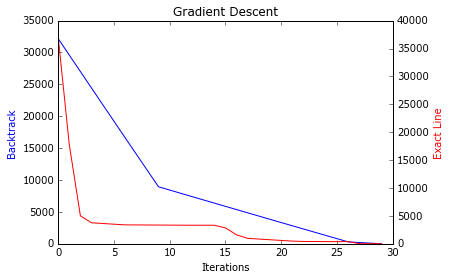

In [207]:
#Plotting both Gradient Descent methods together
fig, ax1 = plt.subplots()
#fig.set_size_inches(1.5, 1.25)

plt.title('Gradient Descent')
ax1.plot(iterk, Diff-min(Diff), 'b-')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Backtrack', color='b')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


ax2 = ax1.twinx()
ax2.plot(iterk, Diffe-min(Diffe), 'r-')
ax2.set_ylabel('Exact Line', color='r')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

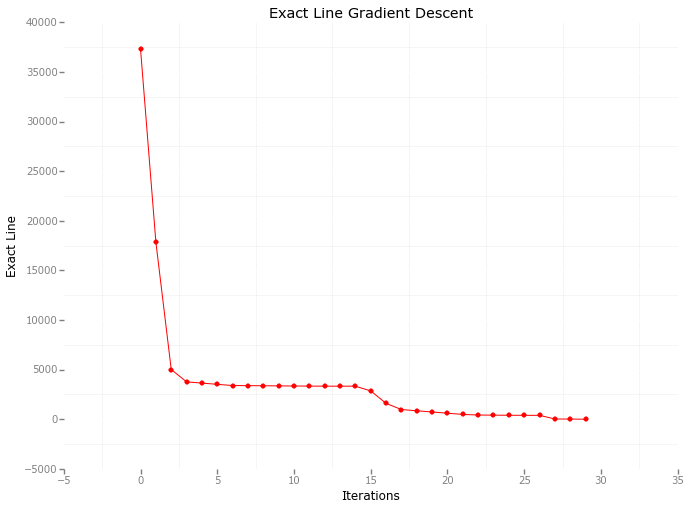

<ggplot: (290100121)>

In [208]:
elplot

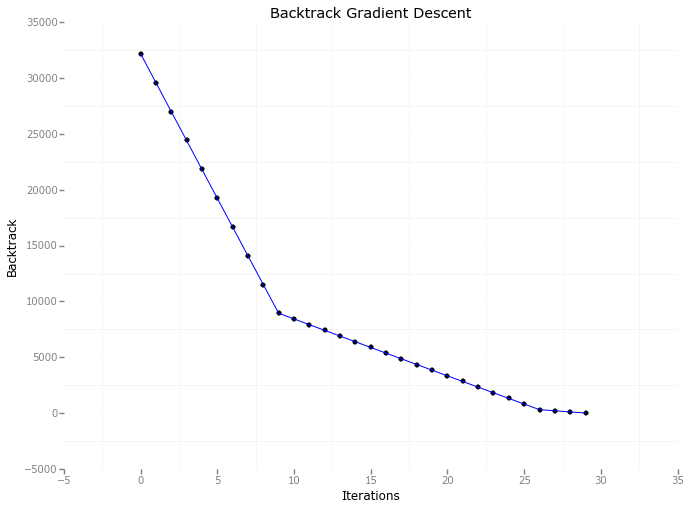

<ggplot: (290100133)>

In [209]:
btplot